<a href="https://colab.research.google.com/github/sandhiya0147/Data_Science/blob/main/accuracymodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SPECIALIZATION TASK:**

"The objective is to build and evaluate 3 machine learning models to predict the Status of an order using the other available features."

IMPORT LIBRARIES:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

LOAD DATASETS:

In [3]:
df = pd.read_csv("amazon_sales_data 2025.csv")

BASIC ANALYSIS:

In [4]:
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nTarget Variable ('Status') Distribution:\n", df["Status"].value_counts())
print("\nBasic Statistics:\n", df.describe(include='all'))

Dataset Shape: (250, 11)

Missing Values:
 Order ID             0
Date                 0
Product              0
Category             0
Price                0
Quantity             0
Total Sales          0
Customer Name        0
Customer Location    0
Payment Method       0
Status               0
dtype: int64

Target Variable ('Status') Distribution:
 Status
Completed    88
Pending      85
Cancelled    77
Name: count, dtype: int64

Basic Statistics:
        Order ID      Date     Product     Category        Price    Quantity  \
count       250       250         250          250   250.000000  250.000000   
unique      250        60          10            5          NaN         NaN   
top     ORD0001  10-02-25  Smartphone  Electronics          NaN         NaN   
freq          1        10          35          118          NaN         NaN   
mean        NaN       NaN         NaN          NaN   343.580000    2.856000   
std         NaN       NaN         NaN          NaN   380.635808    1.4294

VISUAL ANALYSIS:

     Plot Status distribution:

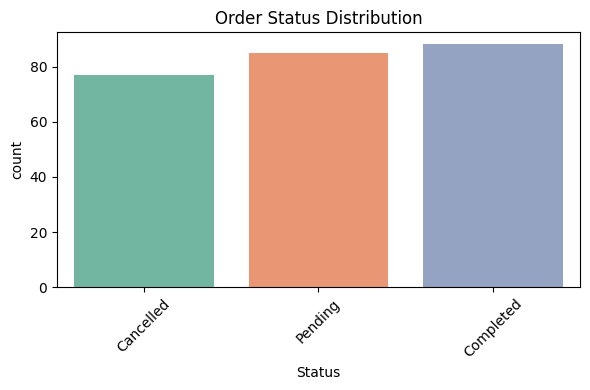

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Status", hue="Status", palette="Set2", legend=False)
plt.title("Order Status Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

      Plot Category-wise sales:

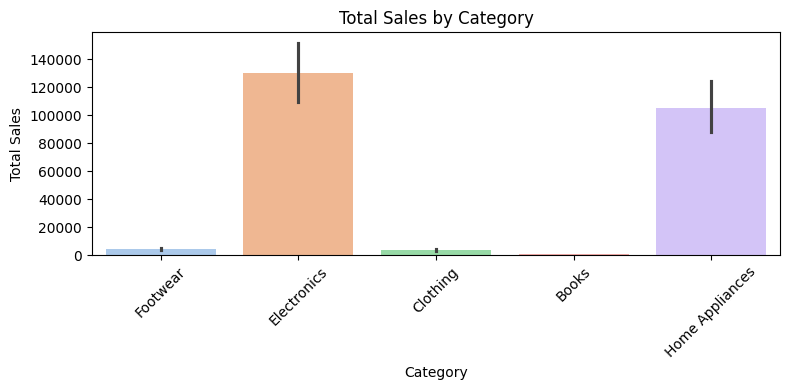

In [9]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x="Category", y="Total Sales", hue="Category", estimator=sum, palette="pastel", legend=False)
plt.title("Total Sales by Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

     Plot Payment Method counts:

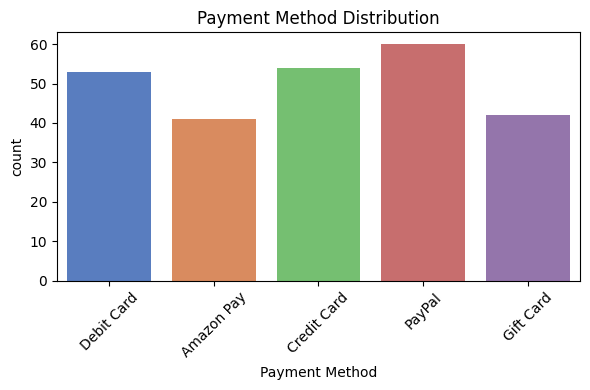

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Payment Method", hue="Payment Method", palette="muted", legend=False)
plt.title("Payment Method Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Correlation heatmap (numerical & encoded features only):

In [12]:
df_corr = df.drop(columns=["Order ID", "Customer Name", "Date"]).copy()
for col in df_corr.select_dtypes(include='object'):
    df_corr[col] = LabelEncoder().fit_transform(df_corr[col])

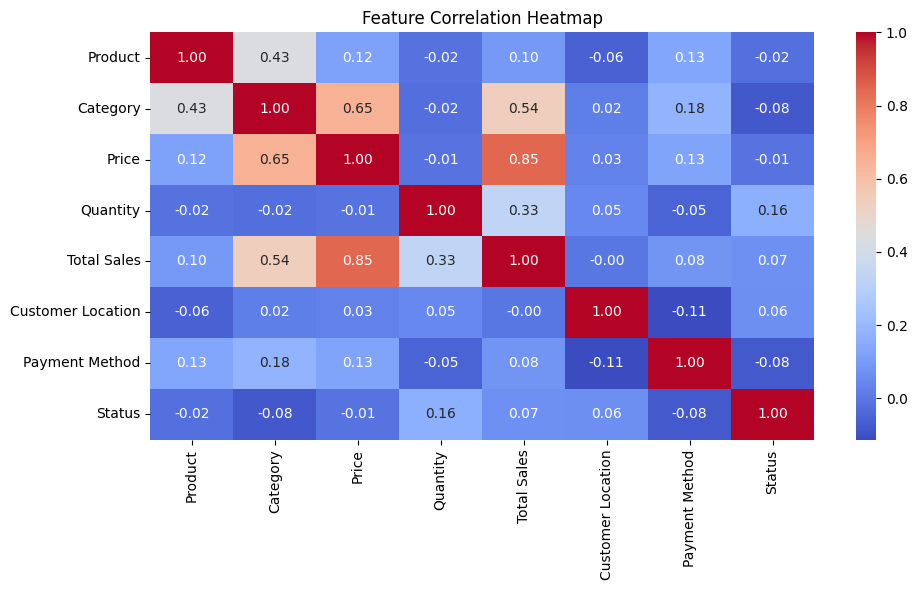

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

MODEL TRAINING:

In [14]:
df_model = df.drop(columns=["Order ID", "Customer Name", "Date"])

Encode categorical features:

In [15]:
label_encoders = {}
for col in df_model.select_dtypes(include="object").columns:
    if col != "Status":
        le = LabelEncoder()
        df_model[col] = le.fit_transform(df_model[col])
        label_encoders[col] = le

Encode target variable:

In [16]:
target_encoder = LabelEncoder()
df_model["Status"] = target_encoder.fit_transform(df_model["Status"])

 Split features and target:

In [17]:
X = df_model.drop("Status", axis=1)
y = df_model["Status"]

Standardize the features:

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train/test split:

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Model 1: Logistic Regression**

In [20]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, log_pred)
print(f"\nLogistic Regression Accuracy: {log_accuracy:.2f}")


Logistic Regression Accuracy: 0.36


**Model 2: Random Forest**

In [21]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Random Forest Accuracy: 0.32


**Model 3: SVM**

In [22]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy: {svm_accuracy:.2f}")

SVM Accuracy: 0.42


Here are the accuracy results for the three machine learning models trained to predict the order status:

| Model                        | Accuracy |
| ---------------------------- | -------- |
| Logistic Regression          | 36%      |
| Random Forest                | 32%      |
| **Support Vector Machine (SVM)** | **42%**      |


**Observations:**

All models have relatively low accuracy, suggesting the features may not be highly predictive of Status.

SVM performed best among the three, but still only achieved 42%.